In [2]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
datadir = '/Users/sidv88/Documents/Data_Management_2/Data/'
train_data = pd.read_csv(datadir + 'train_rgb.csv')
test_data = pd.read_csv(datadir + 'test_rgb.csv')
print(train_data.shape)
print(test_data.shape)

(50000, 3074)
(10000, 3074)


In [4]:
train_data.head()

,Class,Class Name,0,1,2,3,4,5,6,7,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,6,frog,59,62,63,43,46,45,50,48,...,104,216,184,140,151,118,84,123,92,72
1,9,truck,154,177,187,126,137,136,105,104,...,136,143,133,139,143,134,142,143,133,144
2,9,truck,255,255,255,253,253,253,253,253,...,79,78,85,83,79,85,83,80,86,84
3,4,deer,28,25,10,37,34,19,38,35,...,38,54,47,28,63,56,37,72,65,46
4,1,automobile,170,180,198,168,178,196,177,185,...,78,75,79,82,71,75,78,73,77,80


In [5]:
test_data.head()

,Class,Class Name,0,1,2,3,4,5,6,7,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,3,cat,158,112,49,159,111,47,165,116,...,145,24,77,124,34,84,129,21,67,110
1,8,ship,235,235,235,231,231,231,232,232,...,163,168,183,178,180,195,191,186,200,199
2,8,ship,158,190,222,158,187,218,139,166,...,37,5,6,8,4,5,3,7,8,7
3,0,airplane,155,156,149,167,176,187,176,179,...,53,60,63,50,64,65,52,73,68,50
4,6,frog,65,68,50,70,81,64,48,64,...,147,143,179,136,154,185,146,128,156,117


In [6]:
x_train = train_data.iloc[:, 2:]
print(x_train.shape)
y_train = train_data.iloc[:, [0, 1]]
print(y_train.shape)

(50000, 3072)
(50000, 2)


In [7]:
x_test = test_data.iloc[:, 2:]
print(x_test.shape)
y_test = test_data.iloc[:, [0, 1]]
print(y_test.shape)

(10000, 3072)
(10000, 2)


In [8]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [9]:
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [10]:
x_train = x_train.reshape(len(x_train), 32, 32, 3)
x_test = x_test.reshape(len(x_test), 32, 32, 3)
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [11]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [12]:
input_img = Input(shape = (32, 32, 3))


encoded = Conv2D(16, (3, 3), activation = 'relu', padding = 'same')(input_img)
encoded = MaxPooling2D((2, 2), padding = 'same')(encoded)
encoded = Conv2D(8, (3, 3), activation = 'relu', padding = 'same')(encoded)
encoded = MaxPooling2D((2, 2), padding = 'same')(encoded)
encoded = Conv2D(8, (3, 3), activation = 'relu', padding = 'same')(encoded)
encoded = MaxPooling2D((2, 2), padding = 'same')(encoded)

decoded = Conv2D(8, (3, 3), activation = 'relu', padding = 'same')(encoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(8, (3, 3), activation = 'relu', padding = 'same')(decoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(16, (3, 3), activation = 'relu', padding = 'same')(decoded)
decoded = UpSampling2D((2, 2))(decoded)

decoded = Conv2D(3, (3, 3), activation = 'tanh', padding = 'same')(decoded)

In [13]:
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

In [14]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 8)           584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 8)           0   

In [15]:
encoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 8)           584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 8)           0   

In [16]:
autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy', metrics = ['accuracy'])
autoencoder.fit(x_train, x_train, epochs = 50, batch_size = 256, shuffle = True, validation_data = [x_test, x_test])

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 82s 2ms/step - loss: 0.7728 - accuracy: 0.0080 - val_loss: 0.6583 - val_accuracy: 0.0110
Epoch 2/50
50000/50000 [==============================] - 81s 2ms/step - loss: 0.6454 - accuracy: 0.0110 - val_loss: 0.6321 - val_accuracy: 0.0116
Epoch 3/50
50000/50000 [==============================] - 82s 2ms/step - loss: 0.6309 - accuracy: 0.0115 - val_loss: 0.6283 - val_accuracy: 0.0117
Epoch 4/50
50000/50000 [==============================] - 82s 2ms/step - loss: 0.6246 - accuracy: 0.0116 - val_loss: 0.6247 - val_accuracy: 0.0118
Epoch 5/50
50000/50000 [==============================] - 82s 2ms/step - loss: 0.6215 - accuracy: 0.0117 - val_loss: 0.6314 - val_accuracy: 0.0118
Epoch 6/50
50000/50000 [==============================] - 82s 2ms/step - loss: 0.6188 - accuracy: 0.0117 - val_loss: 0.6171 - val_accuracy: 0.0119
Epoch 7/50
50000/50000 [==============================] - 82s 2ms/st

In [17]:
encoded_test_data = encoder.predict(x_test)
predicted_test_data = autoencoder.predict(x_test)

In [18]:
encoded_test_data.shape

(10000, 4, 4, 8)

In [19]:
encoded_test_data = encoded_test_data.reshape(len(encoded_test_data), np.prod(encoded_test_data.shape[1:]))

In [20]:
encoded_test_data.shape

(10000, 128)

In [21]:
y_test

,Class,Class Name
0,3,cat
1,8,ship
2,8,ship
3,0,airplane
4,6,frog
...,...,...
9995,8,ship
9996,3,cat
9997,5,dog
9998,1,automobile


In [22]:
encoded_test_data_df = pd.DataFrame(encoded_test_data)
final_encoded_test_data_df = pd.concat([y_test, encoded_test_data_df], axis = 1)
final_encoded_test_data_df.shape

(10000, 130)

In [23]:
datadir = '/Users/sidv88/Documents/Data_Management_2/Convolutional_Encoded_Data/'
final_encoded_test_data_df.to_csv(datadir + 'Convolutional_Encoded_Test_RTADB.csv', index = False)

In [24]:
input_val = input("Enter one of these values {} : ".format(final_encoded_test_data_df['Class Name'].unique()))

Enter one of these values ['cat' 'ship' 'airplane' 'frog' 'automobile' 'truck' 'dog' 'horse' 'deer'
 'bird'] : frog


In [25]:
input_num = input("Enter a number between 0 and 999 : ")

Enter a number between 0 and 999 : 5


In [26]:
from numpy import dot
from numpy.linalg import norm

cosine_similarity = []
cosine_distance = []

for i in range(len(x_test)):
    a = final_encoded_test_data_df.loc[final_encoded_test_data_df['Class Name'] == input_val].iloc[int(input_num), 2:]
    b = final_encoded_test_data_df.iloc[i, 2:]
    cos_sim = dot(a, b)/(norm(a) * norm(b))
    cos_dist = 1 - cos_sim
    cosine_similarity.append(cos_sim)
    cosine_distance.append(cos_dist)
print(len(cosine_similarity))
print(len(cosine_distance))

10000
10000


In [27]:
final_encoded_test_data_df['Cosine Similarity'] = cosine_similarity
final_encoded_test_data_df['Cosine Distance'] = cosine_distance

In [28]:
final_encoded_test_data_df.sort_values(by = ['Cosine Similarity'], ascending = False)

,Class,Class Name,0,1,2,3,4,5,6,7,...,120,121,122,123,124,125,126,127,Cosine Similarity,Cosine Distance
30,6,frog,2.835151,0.0,0.000000,0.000000,0.000000,1.709839,0.000000,0.0,...,6.234947,0.0,0.631592,1.698901,0.201041,1.530942,0.000000,0.0,1.000000,5.960464e-08
9464,4,deer,4.637197,0.0,0.000000,0.765568,0.000000,1.899297,0.000000,0.0,...,6.275325,0.0,0.951507,1.207959,0.286430,2.337124,0.000000,0.0,0.969721,3.027874e-02
3147,2,bird,3.307898,0.0,0.000000,0.702663,0.216953,1.041007,0.000000,0.0,...,5.181047,0.0,0.564435,1.696964,0.581962,0.851739,0.059615,0.0,0.966252,3.374773e-02
8081,6,frog,1.879416,0.0,0.000000,0.000000,0.404161,1.114751,0.000000,0.0,...,6.547514,0.0,1.220558,2.154855,0.657374,0.909774,0.000000,0.0,0.964895,3.510463e-02
7921,4,deer,3.736378,0.0,0.000000,0.764361,0.007286,1.149406,0.000000,0.0,...,4.813269,0.0,1.006828,0.858993,0.204094,1.960776,1.100106,0.0,0.962826,3.717417e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4273,5,dog,0.000000,0.0,1.381143,0.000000,2.811807,0.000000,8.423048,0.0,...,0.000000,0.0,3.010448,0.828045,0.189930,1.505419,14.942132,0.0,0.064210,9.357899e-01
197,8,ship,0.000000,0.0,1.756638,0.012096,1.282238,0.000000,7.314494,0.0,...,0.000000,0.0,1.012315,1.010661,0.571126,1.018511,8.482018,0.0,0.063989,9.360114e-01
6970,0,airplane,0.000000,0.0,1.407517,0.220042,0.991480,0.264332,4.252602,0.0,...,0.000000,0.0,1.564474,1.070420,0.615348,0.584825,9.027497,0.0,0.061111,9.388890e-01
4546,2,bird,0.000000,0.0,1.959098,0.275595,1.573953,0.000000,8.315866,0.0,...,0.000000,0.0,1.521764,2.175414,1.394402,1.819746,13.862460,0.0,0.058253,9.417473e-01


In [29]:
cosine_index = final_encoded_test_data_df.sort_values(by = ['Cosine Similarity'], ascending = False).head(10).index

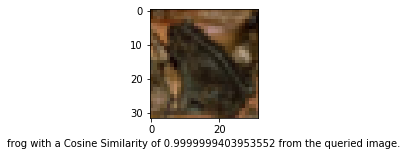

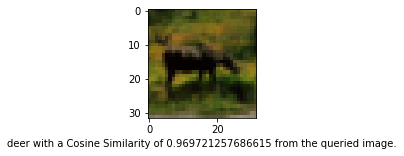

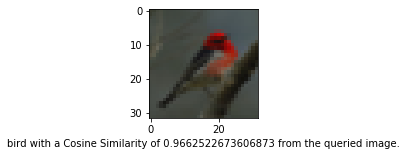

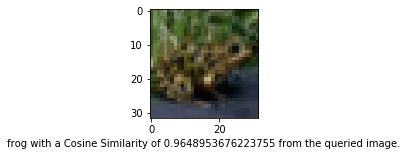

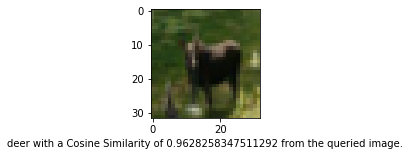

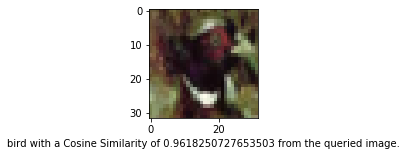

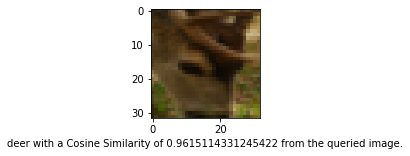

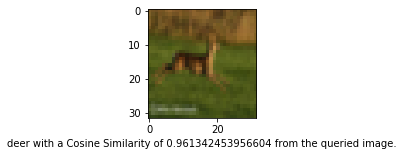

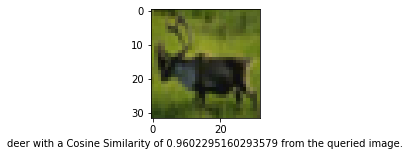

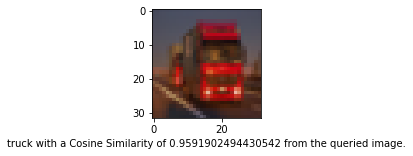

In [30]:
for i in cosine_index:
    plt.figure(figsize = (2, 2))
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.xlabel(final_encoded_test_data_df['Class Name'][i] + ' with a Cosine Similarity of ' + str(final_encoded_test_data_df['Cosine Similarity'][i]) + ' from the queried image.')
    plt.show()

In [31]:
euclidean_distance = []

for i in range(len(x_test)):
    a = final_encoded_test_data_df.loc[final_encoded_test_data_df['Class Name'] == input_val].iloc[int(input_num), 2:]
    b = final_encoded_test_data_df.iloc[i, 2:]
    euc_dist = np.linalg.norm(a-b)
    euclidean_distance.append(euc_dist)
print(len(euclidean_distance))

10000


In [32]:
final_encoded_test_data_df['Euclidean Distance'] = euclidean_distance
final_encoded_test_data_df.sort_values(by = ['Euclidean Distance'])

,Class,Class Name,0,1,2,3,4,5,6,7,...,121,122,123,124,125,126,127,Cosine Similarity,Cosine Distance,Euclidean Distance
30,6,frog,2.835151,0.0,0.000000,0.000000,0.000000,1.709839,0.000000,0.0,...,0.0,0.631592,1.698901,0.201041,1.530942,0.000000,0.0,1.000000,5.960464e-08,0.000000
8081,6,frog,1.879416,0.0,0.000000,0.000000,0.404161,1.114751,0.000000,0.0,...,0.0,1.220558,2.154855,0.657374,0.909774,0.000000,0.0,0.964895,3.510463e-02,5.360610
3147,2,bird,3.307898,0.0,0.000000,0.702663,0.216953,1.041007,0.000000,0.0,...,0.0,0.564435,1.696964,0.581962,0.851739,0.059615,0.0,0.966252,3.374773e-02,5.661786
9464,4,deer,4.637197,0.0,0.000000,0.765568,0.000000,1.899297,0.000000,0.0,...,0.0,0.951507,1.207959,0.286430,2.337124,0.000000,0.0,0.969721,3.027874e-02,5.720258
2595,4,deer,2.643344,0.0,0.000000,0.000000,0.000000,1.776514,0.000000,0.0,...,0.0,1.206879,1.400702,0.705789,1.425646,0.494707,0.0,0.960230,3.977048e-02,5.778261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3823,0,airplane,0.000000,0.0,2.502129,0.000000,2.023693,0.000000,11.385929,0.0,...,0.0,3.113128,0.695481,1.342817,0.808494,16.079105,0.0,0.083848,9.161520e-01,59.425675
8903,0,airplane,0.000000,0.0,2.529732,0.000000,2.025884,0.000000,11.497017,0.0,...,0.0,3.242316,0.551124,0.928901,1.054273,16.397453,0.0,0.067661,9.323394e-01,59.696075
1078,0,airplane,0.000000,0.0,2.522787,0.000000,2.054486,0.000000,11.527015,0.0,...,0.0,4.834627,0.705354,1.055220,0.516528,16.266027,0.0,0.087623,9.123766e-01,60.470973
7803,0,airplane,0.000000,0.0,2.468009,0.000000,2.073180,0.000000,11.316566,0.0,...,0.0,3.918683,1.671607,0.073024,3.319174,15.963008,0.0,0.069721,9.302788e-01,62.464577


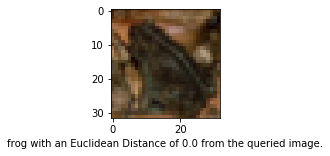

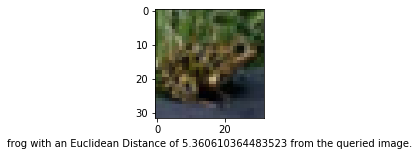

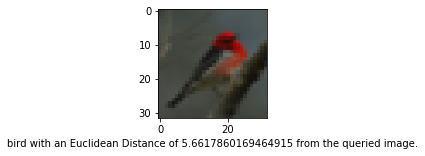

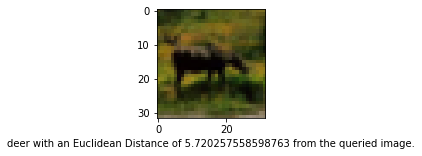

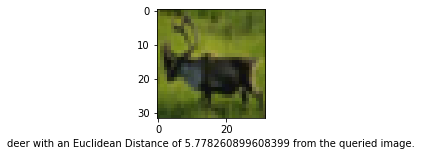

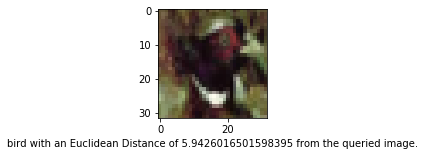

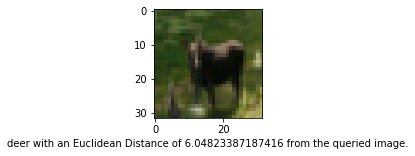

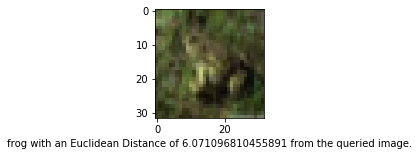

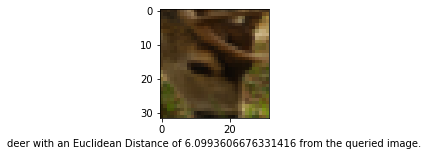

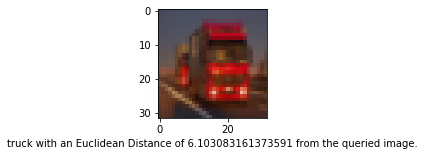

In [33]:
euclidean_index = final_encoded_test_data_df.sort_values(by = ['Euclidean Distance']).head(10).index

for i in euclidean_index:
    plt.figure(figsize = (2, 2))
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.xlabel(final_encoded_test_data_df['Class Name'][i] + ' with an Euclidean Distance of ' + str(final_encoded_test_data_df['Euclidean Distance'][i]) + ' from the queried image.')
    plt.show()